In [ ]:
from pylab import *

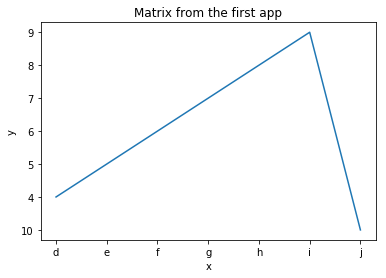

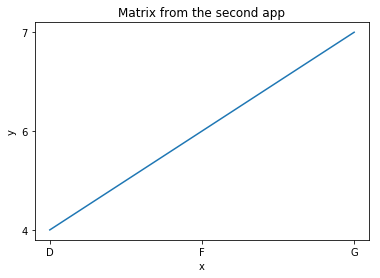

In [1]:
%matplotlib inline
import matplotlib.pyplot as mp

# connect to a QlikEngine and initialize pyqlikengine
from pyqlikengine import pyqlikengine
url = "ws://localhost:4848/app"
qixe = pyqlikengine.QixEngine(url)

# this section creates an app, loads some data, makes a few selections in a dimension, creates a hypercube, converts the hypercube 
# to a list of columns that we can use to plot a chart
app = qixe.create_app('first_app')
qixe.open_app(app)
qixe.load_script("Load Chr(RecNo()+Ord('A')-1) as AlphaUpper, Chr(RecNo()+Ord('a')-1) as AlphaLower,  RecNo() as Num autogenerate 10;")
qixe.select_in_dimension('AlphaUpper', ['A', 'B', 'C'])
qixe.select_excluded_in_dimension("AlphaUpper")
hc = qixe.create_hypercube(["AlphaUpper","AlphaLower"], ['=Sum(Num)', '=Avg(Num)', 'Sum(Num)/7'])
tbl = qixe.convert_hypercube_to_inline_table(hc[0], 'my_table')
mtrx = qixe.convert_hypercube_to_matrix(hc[0], 5)
qixe.delete_app(app)

# create a new app, load the inline table created above, select in the data, create a hypercube and convert to a matrix for plotting
app2 = qixe.create_app('second_app')
qixe.open_app(app2)
qixe.load_script(tbl)
qixe.select_in_dimension('Column0', ['D', 'F', 'G'])
hc2 = qixe.create_hypercube(["Column0"], ['=Sum(Column3)'])
mtrx2 = qixe.convert_hypercube_to_matrix(hc2[0], hc2[1])
qixe.delete_app(app2)

#Plot charts from both apps using matplotlib
mp.figure()
mp.title('Matrix from the first app')
mp.plot(mtrx[1], mtrx[2])
mp.xlabel('x')
mp.ylabel('y')
mp.show()

mp.figure()
mp.title('Matrix from the second app')
mp.plot(mtrx2[0], mtrx2[1])
mp.xlabel('x')
mp.ylabel('y')
mp.show()


In [2]:
import IPython
url = 'http://localhost:4848/single/?appid=C%3A%5CUsers%5Cnln%5CDocuments%5CQlik%5CSense%5CApps%5CConsumer%20Sales.qvf&obj=PyQXKt' \
      '&opt=currsel'
iframe = "<iframe src=" + url +" width=700 height=350 style='border:none;'></iframe>"
IPython.display.HTML(iframe)

<iframe src=http://localhost:4848/single/?appid=C%3A%5CUsers%5Cnln%5CDocuments%5CQlik%5CSense%5CApps%5CConsumer%20Sales.qvf&obj=PyQXKt&opt=currsel width=700 height=350 style='border:none;'></iframe>